In [1]:
import sympy as sp
from IPython.display import display

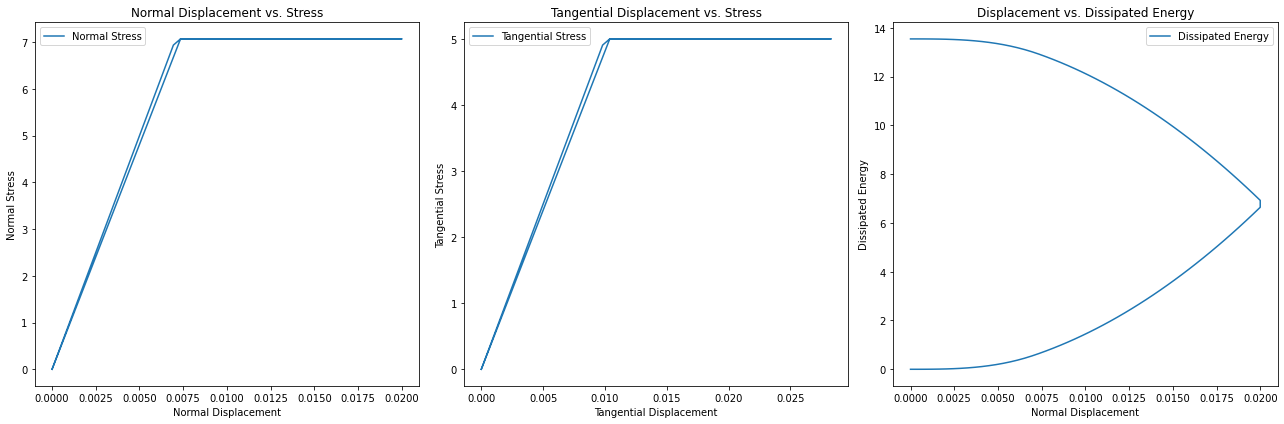

In [5]:
import numpy as np
import matplotlib.pyplot as plt

class MaterialPoint:
    def __init__(self, Kn, Kt, u0):
        self.Kn = Kn  # Normal stiffness
        self.Kt = Kt  # Tangential stiffness
        self.u0 = u0  # Threshold displacement for damage initiation
        self.D = 0.0  # Initial damage

    def helmholtz_potential(self, un, ut):
        psi_n = (1 - self.D) * 0.5 * self.Kn * un**2
        psi_t = (1 - self.D) * 0.5 * self.Kt * np.dot(ut, ut)
        return psi_n + psi_t

    def update_damage(self, un, ut):
        u_max = max(np.abs(un), np.linalg.norm(ut))

        if u_max > self.u0:
            self.D = 1 - self.u0 / u_max

    def stress_normal(self, un):
        return (1 - self.D) * self.Kn * un

    def stress_tangential(self, ut):
        return (1 - self.D) * self.Kt * ut

# Material parameters
Kn = 1000  # Normal stiffness
Kt = 500  # Tangential stiffness
u0 = 0.01  # Threshold displacement for damage initiation

# Create a material point
mp = MaterialPoint(Kn, Kt, u0)

# Loading and unloading scenario
displacement_steps = np.linspace(0, 0.02, 50)
displacement_steps = np.concatenate((displacement_steps, displacement_steps[::-1]))  # Loading and unloading

un_hist = []
ut_hist = []
stress_n_hist = []
stress_t_hist = []
dissipated_energy_hist = []

total_input_energy = 0.0

for un in displacement_steps:
    ut = np.array([un, un])  # Example tangential displacement as a vector

    mp.update_damage(un, ut)
    stress_n = mp.stress_normal(un)
    stress_t = mp.stress_tangential(ut)
    
    un_hist.append(un)
    ut_hist.append(np.linalg.norm(ut))
    stress_n_hist.append(stress_n)
    stress_t_hist.append(np.linalg.norm(stress_t))

    # Calculate elastic energy stored
    elastic_energy = mp.helmholtz_potential(un, ut)
    
    # Increment total input energy
    total_input_energy += stress_n * un + np.dot(stress_t, ut)
    
    # Calculate dissipated energy
    dissipated_energy = total_input_energy - elastic_energy
    dissipated_energy_hist.append(dissipated_energy)

# Plotting results
plt.figure(figsize=(18, 6))

# Normal displacement vs. stress
plt.subplot(1, 3, 1)
plt.plot(un_hist, stress_n_hist, label="Normal Stress")
plt.xlabel("Normal Displacement")
plt.ylabel("Normal Stress")
plt.title("Normal Displacement vs. Stress")
plt.legend()

# Tangential displacement vs. stress
plt.subplot(1, 3, 2)
plt.plot(ut_hist, stress_t_hist, label="Tangential Stress")
plt.xlabel("Tangential Displacement")
plt.ylabel("Tangential Stress")
plt.title("Tangential Displacement vs. Stress")
plt.legend()

# Displacement vs. dissipated energy
plt.subplot(1, 3, 3)
plt.plot(un_hist, dissipated_energy_hist, label="Dissipated Energy")
plt.xlabel("Normal Displacement")
plt.ylabel("Dissipated Energy")
plt.title("Displacement vs. Dissipated Energy")
plt.legend()

plt.tight_layout()
plt.show()
